In [1]:
import os
import time
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import load_model
from dataset_path import output_path
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from keras.models import Sequential, Model,load_model
from keras.layers import Dense, Dropout, Activation, LSTM,  Input, concatenate
from tensorflow.keras import optimizers, metrics
import matplotlib.pyplot as plt
import os
from thesis_helper import * 


pd.set_option('float_format', '{:.3f}'.format)
path = output_path

output_path = os.path.join(path, "Figure3")
if not os.path.exists(output_path):
    os.makedirs(output_path)
df_train = pd.read_csv((os.path.join(path, 'train.csv')))
df_test = pd.read_csv((os.path.join(path, 'test.csv')))
confidence_interval = 95
random_seed = 0
result_list = []

In [2]:
X_train,y_train,X_test,y_test = preprocessing(path,df_train,df_test)

Before filtering: training size = 334480 , testing size = 83620
After filtering: training size = 176213 , testing size = 44063


Feature ranking from random forest

In [ ]:
# sorted_idx = rf.feature_importances_.argsort()
# plt.figure(figsize=(10,20))
# plt.barh(X_train.columns[sorted_idx]
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn import metrics
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()
exp = X_train.copy()
exp.columns = X_train.columns[sorted_idx]
exp = exp.iloc[:, ::-1]

exp1 = X_test.copy()
exp1.columns = X_test.columns[sorted_idx]
exp1 = exp1.iloc[:, ::-1]
lo=LogisticRegression(random_state=1)
i = 1
e_r = []
while i < 64:
    lo.fit(exp.iloc[:,:i],y_train)
    probs = lo.predict_proba(exp1.iloc[:,:i])
    train_r = ROC_result(probs[:,1], y_test, ci=confidence_interval, random_seed=random_seed);
    e_r.append(train_r[0])
    i += 1


KeyboardInterrupt: 

Plot of AUC for feature selection

In [8]:
plt.plot(range(3, len(e_r) + 3), e_r)
plt.xlabel("Number of Variables")
plt.ylabel("AUC")

NameError: name 'e_r' is not defined

C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.6850945858448401
AUPRC: 0.16261421726253897
Sensitivity: 0.6063432835820896
Specificity: 0.6538801021016722
Score thresold: 0.4625668433455522
2.5 97.5


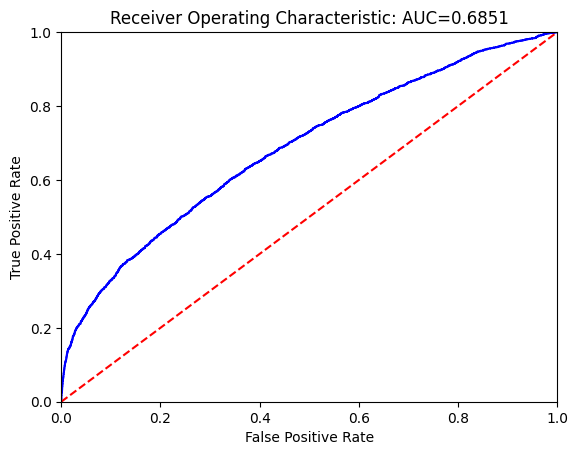

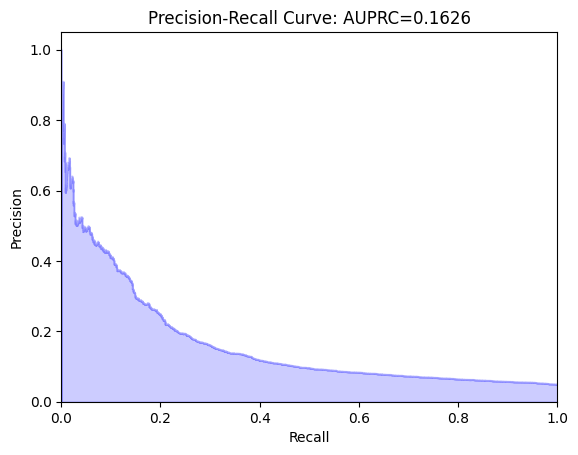

In [9]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority')
X_ros, y_ros = ros.fit_resample(X_train, y_train)
lo,result,runtime = LR_result(X_ros, y_ros,X_test,y_test,confidence_interval,random_seed)

C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.684526036442706
AUPRC: 0.16231604025716267
Sensitivity: 0.6049440298507462
Specificity: 0.6496815286624205
Score thresold: 0.4607659297475671
2.5 97.5


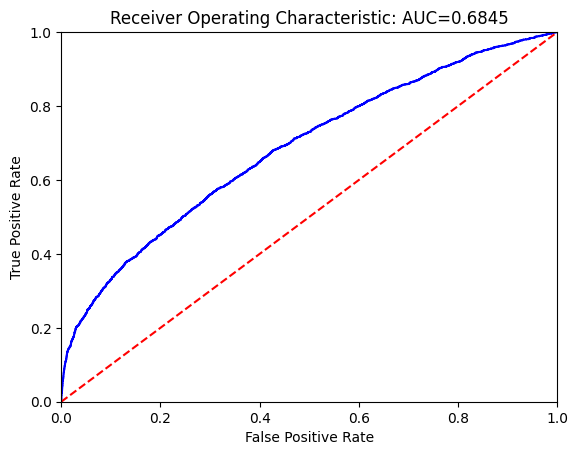

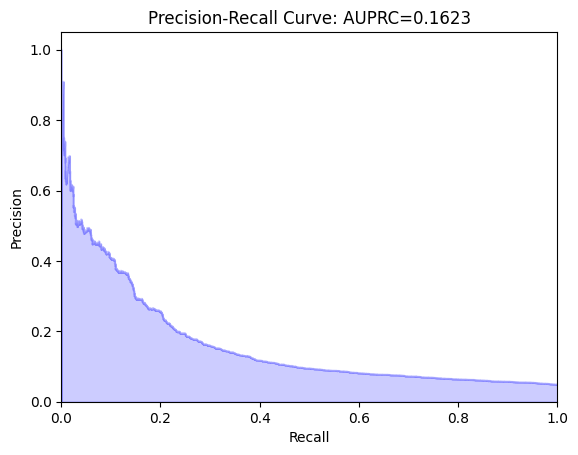

In [4]:
import imblearn
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import SelectFromModel
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import LinearSVC
rus = RandomOverSampler(random_state = 1)

X, y= rus.fit_resample(X_train, y_train)
# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(X)
# Xtest_new = model.transform(X_test)
# X_new.shape
lo=LogisticRegression(random_state=1)
lo,result,runtime = LR_result(X,y,X_test,y_test,confidence_interval,random_seed)

In [5]:
find_sens_speci(lo,X_test,y_test)

(0.1614133395594988,
 0.7554637677870322,
 0.7693647272120041,
 0.48367537313432835)

Learning rate set to 0.034374
0:	learn: 0.6892029	total: 8.54ms	remaining: 8.53s
1:	learn: 0.6855683	total: 17.3ms	remaining: 8.65s
2:	learn: 0.6818300	total: 25.6ms	remaining: 8.51s
3:	learn: 0.6785642	total: 34.3ms	remaining: 8.54s
4:	learn: 0.6753019	total: 42.6ms	remaining: 8.47s
5:	learn: 0.6718756	total: 51.4ms	remaining: 8.51s
6:	learn: 0.6692087	total: 59.2ms	remaining: 8.4s
7:	learn: 0.6666736	total: 67.8ms	remaining: 8.4s
8:	learn: 0.6638470	total: 75.8ms	remaining: 8.35s
9:	learn: 0.6615147	total: 83.8ms	remaining: 8.3s
10:	learn: 0.6590123	total: 92.1ms	remaining: 8.28s
11:	learn: 0.6567605	total: 101ms	remaining: 8.28s
12:	learn: 0.6549077	total: 109ms	remaining: 8.26s
13:	learn: 0.6530506	total: 117ms	remaining: 8.24s
14:	learn: 0.6510893	total: 125ms	remaining: 8.2s
15:	learn: 0.6494810	total: 133ms	remaining: 8.2s
16:	learn: 0.6478764	total: 141ms	remaining: 8.15s
17:	learn: 0.6463695	total: 149ms	remaining: 8.13s
18:	learn: 0.6448656	total: 157ms	remaining: 8.09s
19:	l

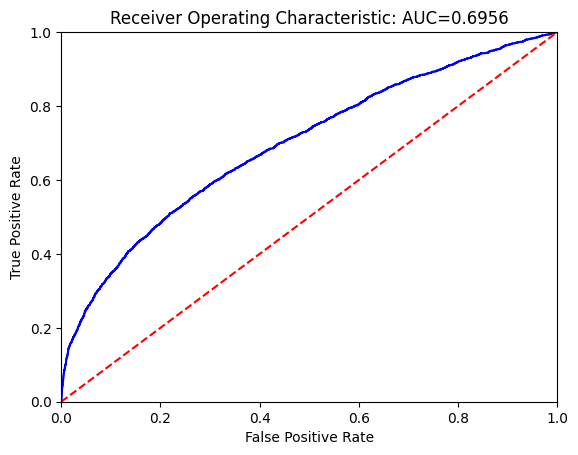

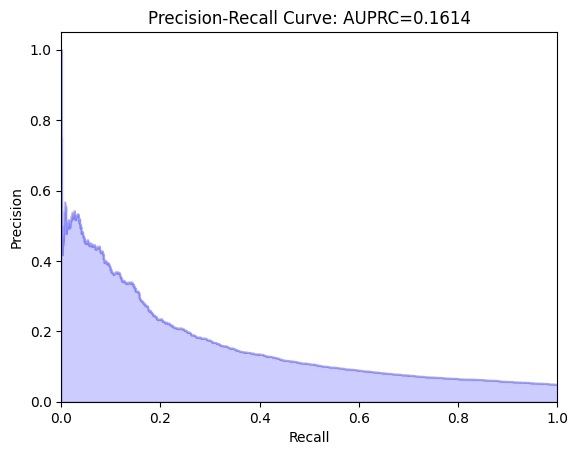

In [27]:
from sklearn.svm import SVC
from catboost import CatBoostRegressor,CatBoostClassifier

cat_model = CatBoostClassifier()
# Fit model
start = time.time()
cat_model.fit(X_new,y)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
import pickle
with open('task3_logreg.pickle', 'wb') as model_dump:
    pickle.dump(cat_model, model_dump)
probs = cat_model.predict_proba(Xtest_new)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)
results = ["CatBoost"]
results.extend(result)
results.append(runtime)
result_list.append(results)

Size after resampling

Learning rate set to 0.034374
0:	learn: 0.6892029	total: 9.22ms	remaining: 9.22s
1:	learn: 0.6855683	total: 17.2ms	remaining: 8.58s
2:	learn: 0.6818300	total: 25.9ms	remaining: 8.6s
3:	learn: 0.6785642	total: 34.1ms	remaining: 8.5s
4:	learn: 0.6753019	total: 42.6ms	remaining: 8.47s
5:	learn: 0.6718756	total: 50.8ms	remaining: 8.41s
6:	learn: 0.6692087	total: 59.5ms	remaining: 8.45s
7:	learn: 0.6666736	total: 67.4ms	remaining: 8.36s
8:	learn: 0.6638470	total: 75.9ms	remaining: 8.36s
9:	learn: 0.6615147	total: 84ms	remaining: 8.32s
10:	learn: 0.6590123	total: 92.8ms	remaining: 8.35s
11:	learn: 0.6567605	total: 101ms	remaining: 8.28s
12:	learn: 0.6549077	total: 109ms	remaining: 8.28s
13:	learn: 0.6530506	total: 117ms	remaining: 8.25s
14:	learn: 0.6510893	total: 126ms	remaining: 8.27s
15:	learn: 0.6494810	total: 134ms	remaining: 8.23s
16:	learn: 0.6478764	total: 143ms	remaining: 8.26s
17:	learn: 0.6463695	total: 151ms	remaining: 8.23s
18:	learn: 0.6448656	total: 159ms	remaining: 8.21s
19:	

C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.6955887607336537
AUPRC: 0.16459635914235987
Sensitivity: 0.6464552238805971
Specificity: 0.6359645983921371
Score thresold: 0.3091494236060819
2.5 97.5


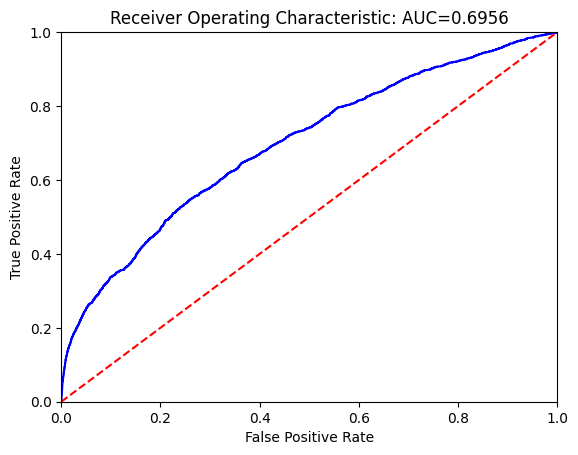

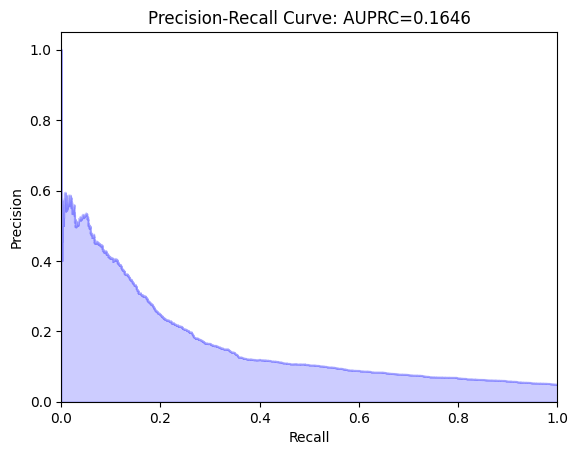

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostRegressor,CatBoostClassifier
clf1 = GaussianNB()
clf2 = CatBoostClassifier()
clf3 = LogisticRegression(random_state=1)
eclf = VotingClassifier(estimators=[('NB', clf1), ('CB', clf2), ('LR', clf3)],voting='soft')
start = time.time()
eclf.fit(X_new, y)
runtime = time.time() - start
probs = eclf.predict_proba(Xtest_new)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)
results = ["Ensemble Classfier"]
results.extend(result)
results.append(runtime)
result_list.append(results)

CM for test(resampling)

In [ ]:
X, y= rus.fit_resample(X_train, y_train)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
Xtest_new = model.transform(X_test)


In [31]:
X_new = pd.DataFrame(X_new)
Xtest_new = pd.DataFrame(Xtest_new)

In [32]:
train_data_gen, test_data_gen = convert_data1(X_new, Xtest_new)

In [34]:
input_1  = Input(shape=(train_data_gen.shape[1], train_data_gen.shape[2]),  name='input_1')
dense_1 = Dense(96, activation='relu')(input_1)
lstm1  = LSTM(32, name='lstm1')(input_1)
output1 = Dense(64, activation='relu')(lstm1)
output2 = Dense(1, activation='sigmoid')(output1)
lstm = Model(inputs=[input_1], outputs=output2)
lstm.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy', 'AUC', 
                       'TruePositives', 'TrueNegatives', 'Precision', 'Recall'])
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10)
    ,]
epoch_num = 20
start = time.time()
lstm.fit(train_data_gen,y,epochs =epoch_num, batch_size = 200,callbacks=my_callbacks,
                    validation_data=(test_data_gen , y_test))
runtime = time.time() - start
print('Training time:', runtime, 'seconds')
lstm.save('72h_ed_revisit_lstm')

Epoch 1/20
85/85 [==============================] - 5s 33ms/step - loss: 0.6649 - accuracy: 0.5957 - auc: 0.6313 - true_positives: 4371.0000 - true_negatives: 5641.0000 - precision: 0.6127 - recall: 0.5201 - val_loss: 0.6701 - val_accuracy: 0.7414 - val_auc: 0.6748 - val_true_positives: 1089.0000 - val_true_negatives: 31580.0000 - val_precision: 0.0953 - val_recall: 0.5079
Epoch 2/20
85/85 [==============================] - 2s 26ms/step - loss: 0.6404 - accuracy: 0.6301 - auc: 0.6695 - true_positives: 3868.0000 - true_negatives: 6723.0000 - precision: 0.6971 - recall: 0.4603 - val_loss: 0.5760 - val_accuracy: 0.8323 - val_auc: 0.6770 - val_true_positives: 853.0000 - val_true_negatives: 35819.0000 - val_precision: 0.1227 - val_recall: 0.3979
Epoch 3/20
85/85 [==============================] - 2s 26ms/step - loss: 0.6405 - accuracy: 0.6288 - auc: 0.6680 - true_positives: 3940.0000 - true_negatives: 6629.0000 - precision: 0.6894 - recall: 0.4688 - val_loss: 0.6673 - val_accuracy: 0.7210 -

INFO:tensorflow:Assets written to: 72h_ed_revisit_lstm\assets


INFO:tensorflow:Assets written to: 72h_ed_revisit_lstm\assets


LSTM:
1377/1377 [==============================] - 3s 2ms/step
AUC: 0.6865143014797906
AUPRC: 0.16059567827015328
Sensitivity: 0.6166044776119403
Specificity: 0.6535938357308142
Score thresold: 0.49849045
2.5 97.5


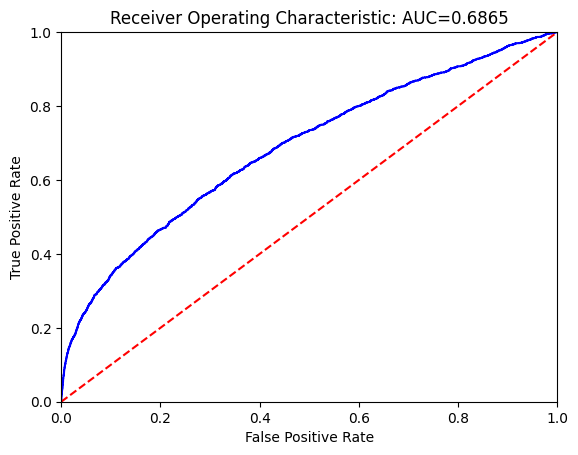

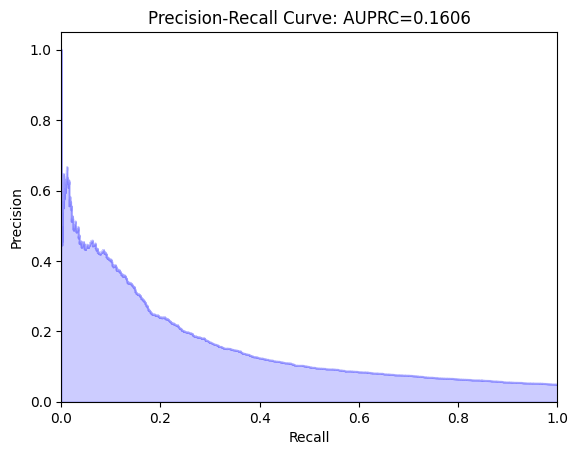

In [35]:
print("LSTM:")
lstm = load_model('72h_ed_revisit_lstm')
probs = lstm.predict(test_data_gen)
result = PlotROCCurve(probs, y_test, ci=confidence_interval, random_seed=random_seed)
results = ["LSTM"]
results.extend(result)
results.append(runtime)
result_list.append(results)

CM for train(resampling)

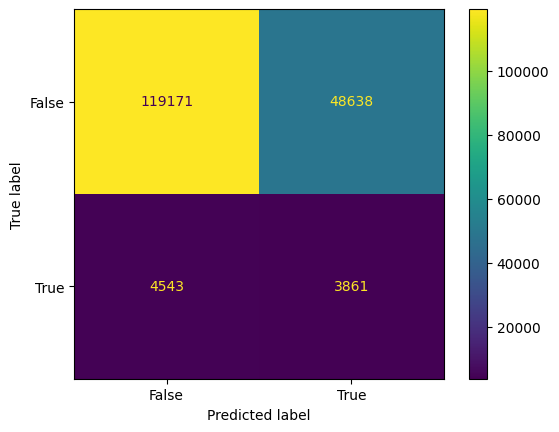

0.6982004732908469


In [17]:
probs_em = lo.predict(X_train)
cm1 = metrics.confusion_matrix(y_train,probs_em)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])

cm_display.plot()
plt.savefig(path + '/confusion_matrix.png')
plt.show()
acc = metrics.accuracy_score(y_train, probs_em)
print(acc)